<a href="https://colab.research.google.com/github/Mrmazenn1/ML-intern-at-Elevvo-/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df= pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.shape)

(200, 5)


In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
df=df[["Annual Income (k$)","Spending Score (1-100)"]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
df.isnull().sum()

,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


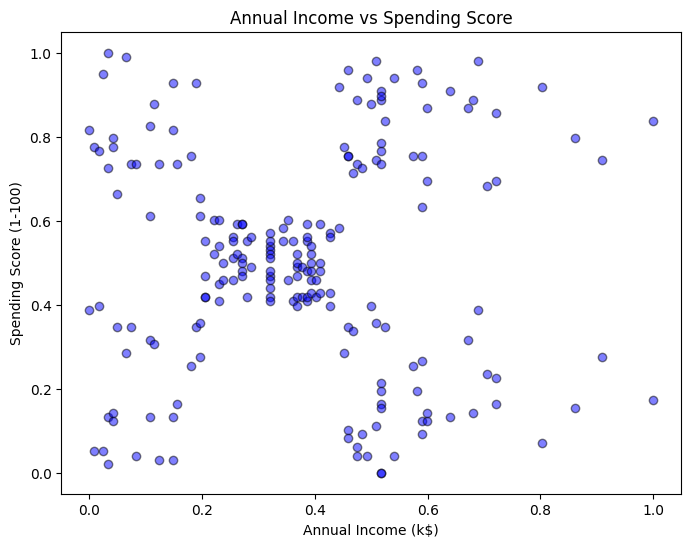

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],c="blue", alpha=0.5,edgecolors='black')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

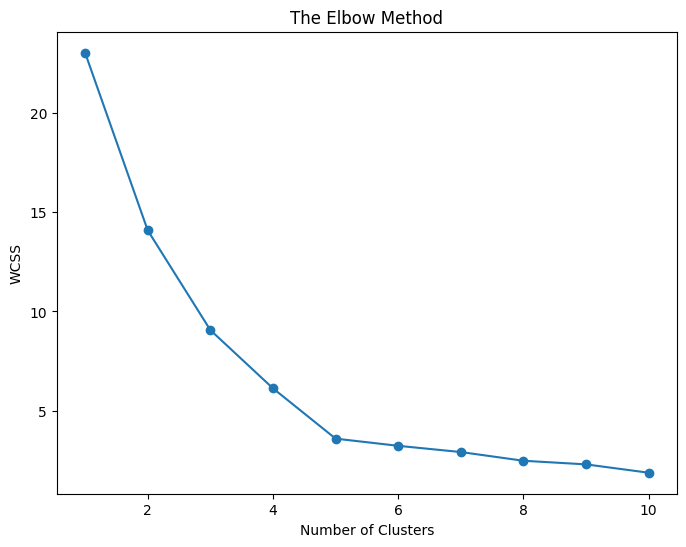

In [ ]:
wcs =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(df_scaled)
    wcs.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1,11),wcs,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)


In [ ]:
df["Cluster"] = df_scaled["cluster"]
df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


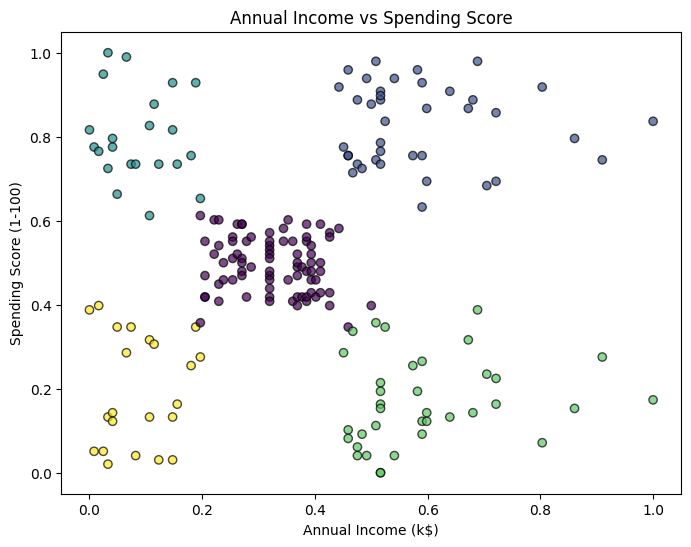

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],c=df_scaled['cluster'], cmap='viridis',alpha=0.7,edgecolors='black')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

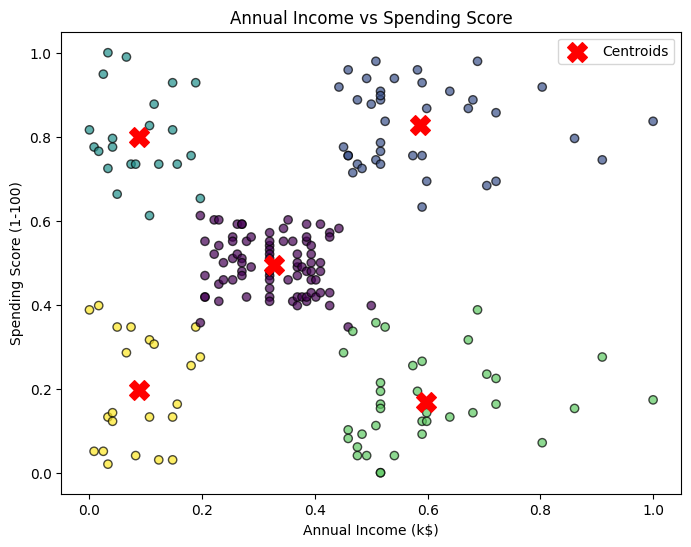

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'],c=df_scaled['cluster'], cmap='viridis',alpha=0.7,edgecolors='black')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})
cluster_summary

Annual Income (k$)          Spending Score (1-100)        
                      mean min  max                   mean min max
Cluster                                                           
0                54.888889  39   76              49.543210  35  61
1                86.538462  69  137              82.128205  63  97
2                25.727273  15   39              79.363636  61  99
3                87.750000  70  137              17.583333   1  39
4                25.727273  15   39              20.227273   3  40

In [ ]:
cluster_labels={
    0: "Mid Income, Moderate Spending",
    1: "Wealthy, Low Spending",
    2: "Low Income, Low Spending",
    3: "Low Income, High Spending",
    4: "Wealthy, High Spending"
}

In [ ]:
counts = df["Cluster"].value_counts().sort_index()
pct =(counts/counts.sum()*100).round(1)


In [ ]:
centers_original =(
    df.groupby("Cluster")
    .mean()
    .reindex(range(5)
)
)

In [ ]:
label_texts = {}
for i in range(5):
    base = cluster_labels.get(i,f"Cluster {i}")
    n = int(counts.get(i,0))
    p=pct.get(i,0)
    label_texts[i]=f"{base} ({n} ({p}%))"

In [ ]:
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.arange(5))

<Figure size 1000x800 with 0 Axes>

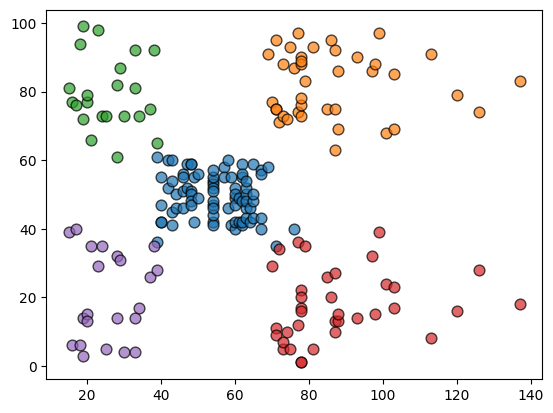

In [ ]:
for i in range (5):
  mask = df["Cluster"] == i
  plt.scatter(
      df.loc[mask, "Annual Income (k$)"],
      df.loc[mask, "Spending Score (1-100)"],
      s=60,
      alpha=0.7,
      edgecolors="black",
      color=colors[i],
      label=label_texts[i]
  )

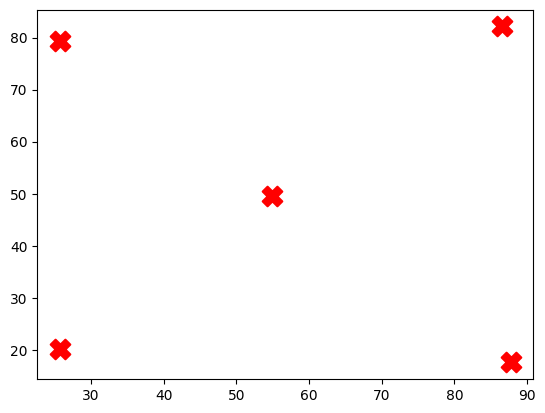

In [ ]:
plt.scatter(
    centers_original["Annual Income (k$)"],
    centers_original["Spending Score (1-100)"],
    s=200,
    marker="X",
    color="red",
    label="Centroids",
    linewidths=1.5,
    zorder = 5
)

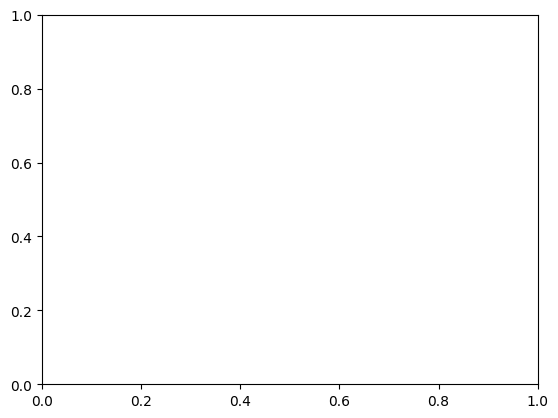

In [ ]:
for i, (x,y) in enumerate(centers_original.values):
    plt.annotate (
        label_texts[i],
        xy=(x,y),
        ha="center",
        va="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.7),
        fontsize=9,
        fontweight="bold"
    )

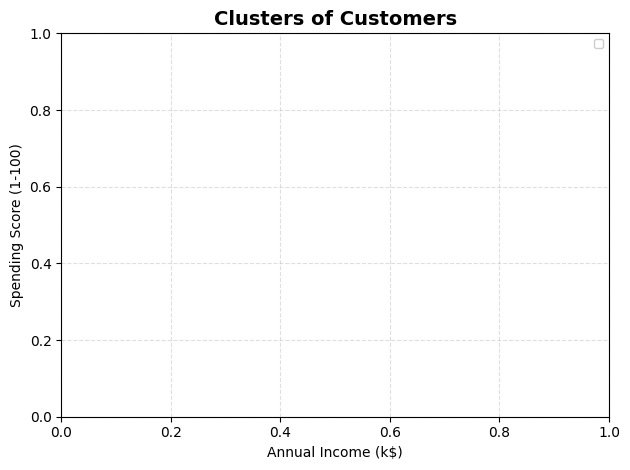

In [ ]:
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters of Customers",fontsize=14 ,fontweight='bold')
plt.legend(loc = "upper right",fontsize ="small", framealpha=0.95)
plt.grid(True ,linestyle="--",alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
df_scaled = df_scaled.drop(columns=['cluster'])
print (df_scaled)

     Annual Income (k$)  Spending Score (1-100)
0              0.000000                0.387755
1              0.000000                0.816327
2              0.008197                0.051020
3              0.008197                0.775510
4              0.016393                0.397959
..                  ...                     ...
195            0.860656                0.795918
196            0.909836                0.275510
197            0.909836                0.744898
198            1.000000                0.173469
199            1.000000                0.836735

[200 rows x 2 columns]


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['cluster'] = dbscan.fit_predict(df_scaled)
print("Unique cluster labels and counts:")
print(np.unique(df_scaled['cluster'], return_counts=True))

Unique cluster labels and counts:
(array([0]), array([200]))


In [ ]:
for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(3, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.2f}, min_samples={min_samples} --> clusters: {n_clusters}, noise: {n_noise}")

eps=0.10, min_samples=3 --> clusters: 3, noise: 10
eps=0.10, min_samples=4 --> clusters: 2, noise: 13
eps=0.10, min_samples=5 --> clusters: 3, noise: 14
eps=0.20, min_samples=3 --> clusters: 1, noise: 0
eps=0.20, min_samples=4 --> clusters: 1, noise: 0
eps=0.20, min_samples=5 --> clusters: 1, noise: 0
eps=0.30, min_samples=3 --> clusters: 1, noise: 0
eps=0.30, min_samples=4 --> clusters: 1, noise: 0
eps=0.30, min_samples=5 --> clusters: 1, noise: 0
eps=0.40, min_samples=3 --> clusters: 1, noise: 0
eps=0.40, min_samples=4 --> clusters: 1, noise: 0
eps=0.40, min_samples=5 --> clusters: 1, noise: 0
eps=0.50, min_samples=3 --> clusters: 1, noise: 0
eps=0.50, min_samples=4 --> clusters: 1, noise: 0
eps=0.50, min_samples=5 --> clusters: 1, noise: 0
eps=0.60, min_samples=3 --> clusters: 1, noise: 0
eps=0.60, min_samples=4 --> clusters: 1, noise: 0
eps=0.60, min_samples=5 --> clusters: 1, noise: 0
eps=0.70, min_samples=3 --> clusters: 1, noise: 0
eps=0.70, min_samples=4 --> clusters: 1, noise:

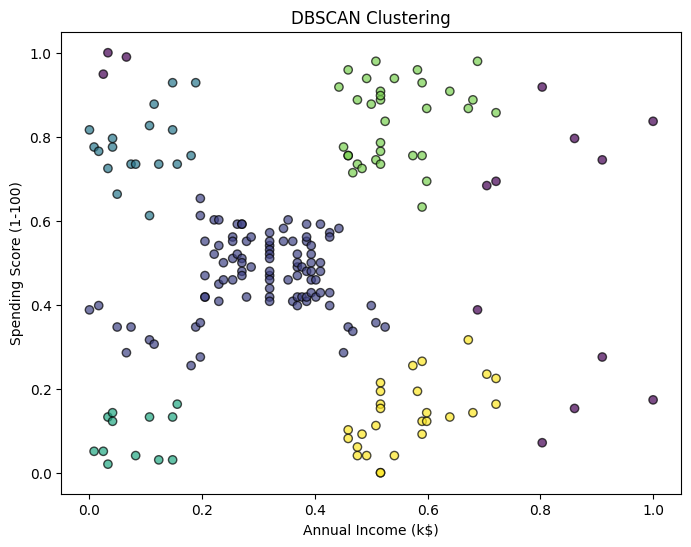

In [ ]:
dbscan = DBSCAN(eps=0.09, min_samples=4)
labels = dbscan.fit_predict(df_scaled)
pl
df_scaled['cluster'] = labels
print("Unique cluster labels and counts:")
print(np.unique(df_scaled['cluster'], return_counts=True))